In [ ]:
pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Importing necessary packages

Loading dataset

In [43]:
fashion_mnist = keras.datasets.mnist

Splitting Dataset in Test and Train

In [44]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [ ]:
train_images[0]

Creating class name (Classification) from 0 to 9

In [46]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

In [38]:
train_images.shape
test_images.shape

(10000, 28, 28)

In [ ]:
plt.imshow(train_images[3])
plt.grid(False)

Dividing train and test images by 255. This will make our pixels in between 0 to 1.

In [ ]:
train_images = train_images/255
test_images = test_images/255

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images[1]

Creating final model using keras.
This model has 3 layes
Input layer
Hidden layer 
Output layer

In hidden layer, I have used relu activtion function. ReLU is half rectified. f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero

In output layer, softmax activation funtion helps me to reach desired accuracy.The softmax function is a more generalized logistic activation function which is used for multiclass classification. 

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(10,activation = tf.nn.softmax)
])

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.fit(train_images,train_labels,epochs=5)

In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

In [33]:
# Getting the accuracy of model
test_acc

0.9775

In [34]:
# Predicting the output
predictions = model.predict(test_images)

In [35]:
predictions[0]
print(np.argmax(predictions[0]))
print(test_labels[0])

7
7


<function matplotlib.pyplot.show(*args, **kw)>

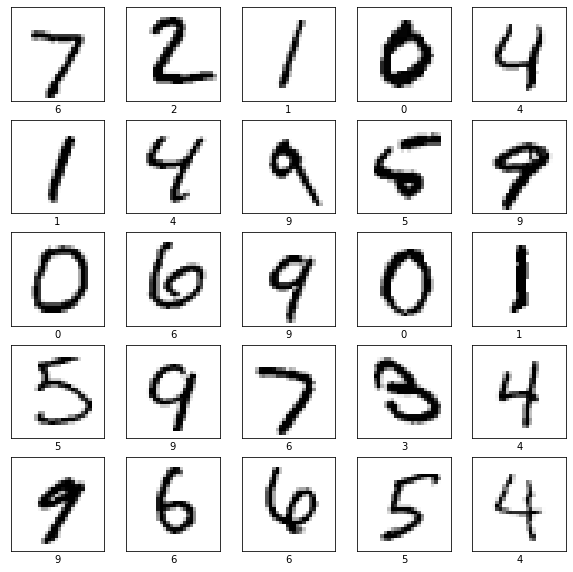

In [36]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show 
                        